<a href="https://colab.research.google.com/github/pagrid/Introduction-to-Complex-Systems-Projects/blob/main/Kuramoto_model_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

**System Initialization**

In [2]:
# Function: Initialize the system
def initialize_system(N, omega_dist, theta_dist="uniform"):
    """
    Initializes the system with natural frequencies and initial phases.

    Parameters:
    - N: Number of oscillators
    - omega_dist: Distribution for natural frequencies ('normal' or 'uniform')
    - theta_dist: Distribution for initial phases ('uniform' only for now)

    Returns:
    - omega: Natural frequencies (array)
    - theta0: Initial phases (array)
    """
    # Generate natural frequencies
    if omega_dist == "normal":
        omega = np.random.normal(0, 1, N)  # Gaussian distribution with mean 0 and std 1
    elif omega_dist == "uniform":
        omega = np.random.uniform(-0.5, 0.5, N)  # Uniform distribution within [-0.5, 0.5]
    else:
        raise ValueError("Unsupported omega distribution. Choose 'normal' or 'uniform'.")

    # Generate initial phases
    if theta_dist == "uniform":
        theta0 = np.random.uniform(0, 2 * np.pi, N)  # Uniform distribution within [0, 2π]
    else:
        raise ValueError("Unsupported theta distribution. Only 'uniform' is implemented.")

    return omega, theta0

**Computation of the Coherence Parameter**

In [3]:
# Function: Compute coherence
def compute_coherence(theta):
    """
    Computes the coherence parameter r from the phase array theta.

    Parameters:
    - theta: Phases of oscillators (array)

    Returns:
    - r: Coherence parameter (float)
    """
    # Compute mean cosine and sine values of theta
    mean_cos = np.mean(np.cos(theta))
    mean_sin = np.mean(np.sin(theta))

    # Compute coherence parameter r
    r = np.sqrt(mean_cos**2 + mean_sin**2)
    return r

**Time Evolution of the System**

In [4]:
# Function: Evolve the system
def evolve_system(omega, theta0, K, T, dt):
    """
    Evolves the Kuramoto model over time for a given coupling constant K.

    Parameters:
    - omega: Natural frequencies (array)
    - theta0: Initial phases (array)
    - K: Coupling constant
    - T: Total simulation time
    - dt: Timestep

    Returns:
    - r_values: Coherence values over time (list)
    """
    theta = np.array(theta0)  # Start with initial phases
    r_values = []  # Store r(t) values

    for _ in np.arange(0, T, dt):
        # Compute coherence parameter
        r = compute_coherence(theta)
        r_values.append(r)

        # Update phases using Kuramoto model
        mean_phase = np.mean(theta)
        theta += dt * (omega + K * r * np.sin(mean_phase - theta))

    return r_values

**Plot: Coherence Parameter vs Coupling Constant**

In [5]:
# Function: Plot coherence vs coupling constant
def plot_coherence_vs_K(omega, theta0, K_range, T, dt):
    """
    Plots the coherence parameter r(T) as a function of the coupling constant K.

    Parameters:
    - omega: Natural frequencies (array)
    - theta0: Initial phases (array)
    - K_range: Range of coupling constants (array)
    - T: Total simulation time
    - dt: Timestep
    """
    coherence_values = []  # Store final r(T) values

    for K in K_range:
        # Simulate the system for this K
        r_values = evolve_system(omega, theta0, K, T, dt)
        coherence_values.append(r_values[-1])  # Take the final coherence value

    # Plot r(T) vs K
    plt.figure(figsize=(8, 6))
    plt.plot(K_range, coherence_values, label="Numerical solution", color="black")
    plt.axvline(x=1.6, color="blue", linestyle="--", label="Critical Value")
    plt.xlabel("Coupling constant K")
    plt.ylabel("Coherence r(T)")
    plt.legend()
    plt.grid()
    plt.title("Coherence vs Coupling Constant")
    plt.show()

**Plot: Time Evolution of Coherence Parameter for Multiple K Values**

In [6]:
# Function: Plot time evolution for specific K values
def plot_time_evolution_for_K(omega, theta0, K_values, T, dt):
    """
    Plots the time evolution of the coherence parameter r(t) for multiple K values.

    Parameters:
    - omega: Natural frequencies (array)
    - theta0: Initial phases (array)
    - K_values: Coupling constants (list or array)
    - T: Total simulation time
    - dt: Timestep
    """
    time = np.arange(0, T, dt)
    plt.figure(figsize=(10, 6))

    for K in K_values:
        # Simulate the system for this K
        r_values = evolve_system(omega, theta0, K, T, dt)
        plt.plot(time, r_values, label=f"K={K}")

    plt.xlabel("Time")
    plt.ylabel("Coherence parameter r(t)")
    plt.title("Time Evolution of Coherence for Various Coupling Constants")
    plt.legend()
    plt.grid()
    plt.show()


**Fixed Frequencies and Varying Phases**

In [7]:
# Function: Fixed frequencies, varying phases
def kuramoto_model_fixed_frequencies(N, T, dt, K, num_runs, freq_mean, freq_std):
    """
    Simulates the Kuramoto model with fixed frequencies but varying phases.
    """
    time = np.arange(0, T, dt)
    omega = np.random.normal(freq_mean, freq_std, N)  # Fixed natural frequencies
    plt.figure(figsize=(10, 6))

    for run in range(num_runs):
        theta0 = np.random.uniform(0, 2 * np.pi, N)  # Varying phases
        r_values = evolve_system(omega, theta0, K, T, dt)
        plt.plot(time, r_values, label=f"Run {run + 1}")

    plt.xlabel("Time")
    plt.ylabel("Coherence parameter r(t)")
    plt.title("Time Evolution for Varying Initial Conditions")
    plt.legend()
    plt.grid()
    plt.show()

**Fixed Phases and Varying Frequencies**

In [8]:
# Function: Fixed phases, varying frequencies
def kuramoto_model_fixed_angles(N, T, dt, K, num_runs, theta_fixed):
    """
    Simulates the Kuramoto model with fixed phases but varying natural frequencies.

    Parameters:
    - N: Number of oscillators
    - T: Total simulation time
    - dt: Timestep
    - K: Coupling constant
    - num_runs: Number of runs with varying natural frequencies
    - theta_fixed: Fixed phases (array)
    """
    time = np.arange(0, T, dt)
    plt.figure(figsize=(10, 6))

    for run in range(num_runs):
        # Generate new natural frequencies for each run
        omega = np.random.normal(0, 1, N)  # Same size as `theta_fixed`
        r_values = evolve_system(omega, theta_fixed, K, T, dt)
        plt.plot(time, r_values, label=f"Run {run + 1}")

    plt.xlabel("Time")
    plt.ylabel("Coherence parameter r(t)")
    plt.title("Time Evolution for Varying Natural Frequencies")
    plt.legend()
    plt.grid()
    plt.show()

**Main Program: Running All Simulations**

Initializing the system...
Computing coherence vs coupling constant...


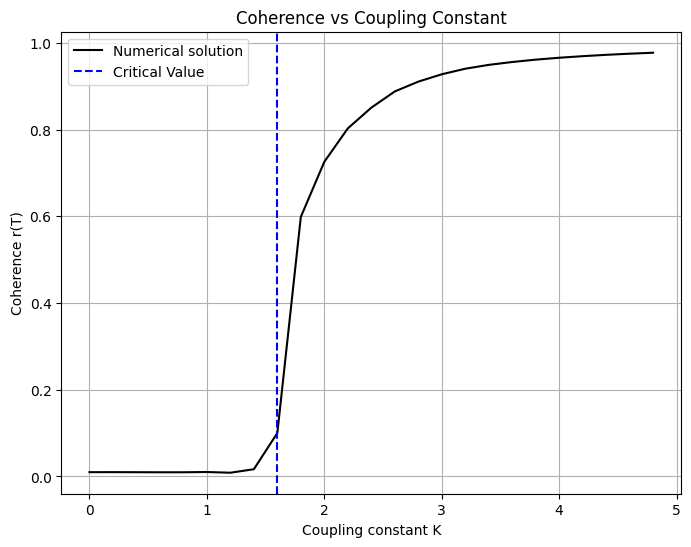

Computing time evolution of coherence for K = 1, 2, 3, 4, 5...


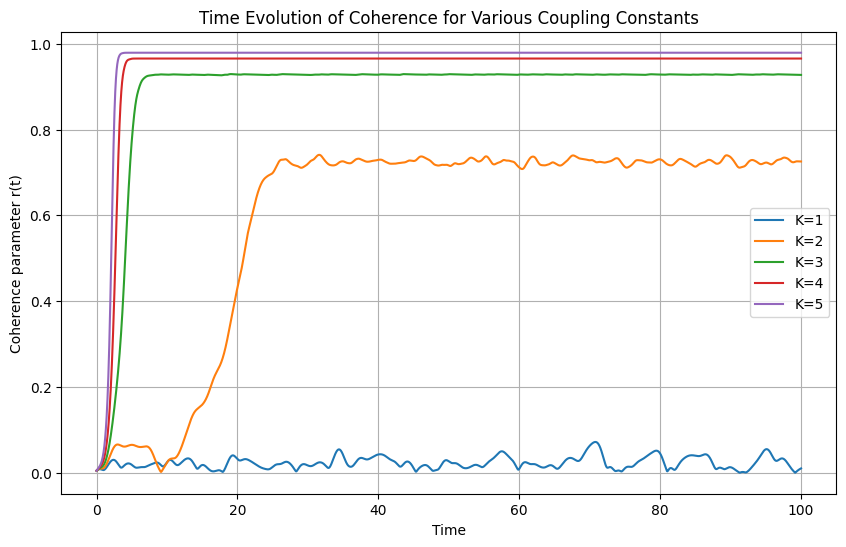

Simulating fixed frequencies and varying initial conditions...


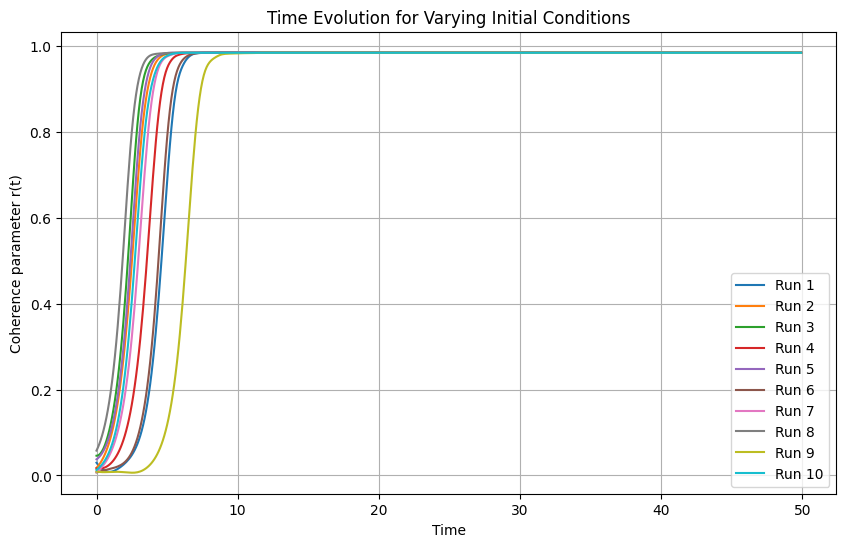

Simulating fixed angles and varying natural frequencies...


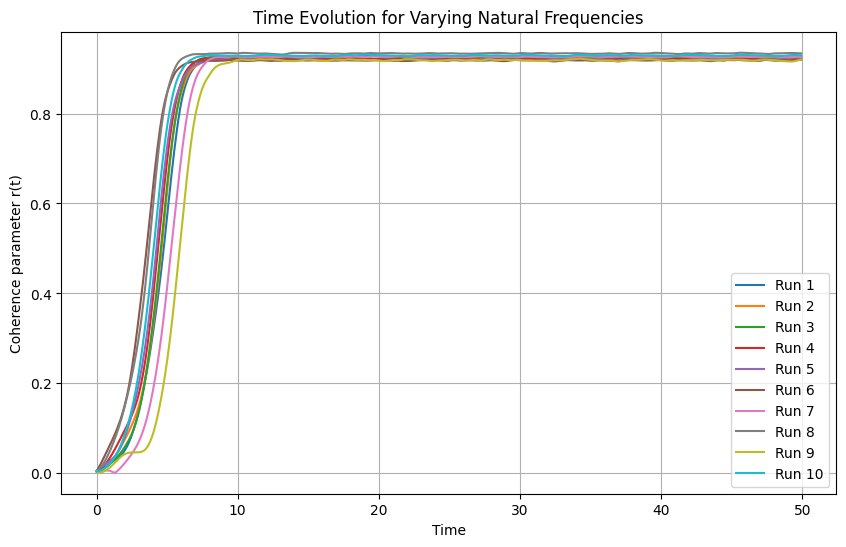

All simulations completed!


In [10]:

# Main Program
if __name__ == "__main__":
    # Parameters
    N = 2000          # Number of oscillators
    T = 100           # Simulation time
    dt = 0.01         # Timestep
    k_fixed = 1.5     # Fixed coupling constant for specific simulations
    num_runs = 10     # Number of runs for varying initial conditions

    # PART 1: Initialize the System
    print("Initializing the system...")
    omega, theta0 = initialize_system(N, omega_dist="normal", theta_dist="uniform")

    # PART 2: Coherence vs Coupling Constant K
    print("Computing coherence vs coupling constant...")
    K_range = np.arange(0, 5, 0.2)
    plot_coherence_vs_K(omega, theta0, K_range, T, dt)

    # PART 3: Time Evolution of Coherence for Specific K Values
    print("Computing time evolution of coherence for K = 1, 2, 3, 4, 5...")
    K_values = [1, 2, 3, 4, 5]
    plot_time_evolution_for_K(omega, theta0, K_values, T, dt)

    # PART 4: Time Evolution with Fixed Frequencies and Varying Phases
    print("Simulating fixed frequencies and varying initial conditions...")
    kuramoto_model_fixed_frequencies(
        N, T=50, dt = 0.1, K=3, num_runs = 10, freq_mean=0, freq_std=0.5
    )

      # PART 5: Time Evolution with Fixed Phases and Varying Frequencies
    print("Simulating fixed angles and varying natural frequencies...")
    kuramoto_model_fixed_angles(
        N, T=50, dt = 0.1, K=3, num_runs = 10, theta_fixed=theta0
    )

    print("All simulations completed!")
